In [3]:
#importantdo as coisas necessarias

import pandas as pd

base = pd.read_csv('train.csv')

#visualizando o dataset de treino

base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# verificando o shape da base de dados

base.shape

(1460, 81)

In [6]:
# verificando as informações da base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#checando os valores vazios

(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [8]:
#verificando as colunas com densidade de valores vazios maior que 5%

elim = base.columns[(base.isnull().sum()/base.shape[0]) > 0.05]

elim

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [9]:
#eliminando as colunas que atendem o critério

base = base.drop(elim,axis=1)

In [10]:
#selecionando as colunas numéricas

columns = base.columns[base.dtypes != 'object']

columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#criando uma nova base a partir desses valores

newbase = base.loc[:,columns]

newbase.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [12]:
#verificando novamente valores vazios

newbase.isnull().sum().sort_values(ascending=False).head(3)

MasVnrArea     8
Id             0
OpenPorchSF    0
dtype: int64

In [14]:
#substituindo valores vazios por -1

newbase = newbase.fillna(-1)

In [16]:
#selecionando os eixos

x = newbase.drop('SalePrice',axis=1)

y = newbase.SalePrice

#importando train_test_split, e separando a base em treino e teste em seguida

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state= 42)

In [17]:
#importando a regressão linear, a arvore de regressão, e o KNN

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

#criando o regressor e fazendo o fit dele com os dados de treino

reg_rl = LinearRegression().fit(x_train, y_train)

# fazendo a previsão pro teste

y_rl = reg_rl.predict(x_test)

#criando o regressor e fazendo o fit (arvore)

reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(x_train, y_train)

# fazendo previsão

y_ar = reg_ar.predict(x_test)

#criando o regressor e fazendo o fit (KNN)

reg_knn = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)

#fazendo a previsão

y_knn = reg_knn.predict(x_test)

In [18]:
#importando os erros (médio absoluto/quadratico médio) pra fazer a avaliação

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#avaliando o erro da regressão

print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23917.24601460244
1571842035.6279793


In [19]:
#erro da árvore de decisão

print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

28126.0622406639
2277454437.1784234


In [20]:
#erro do KNN

print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

32931.85269709543
2715382774.7852697


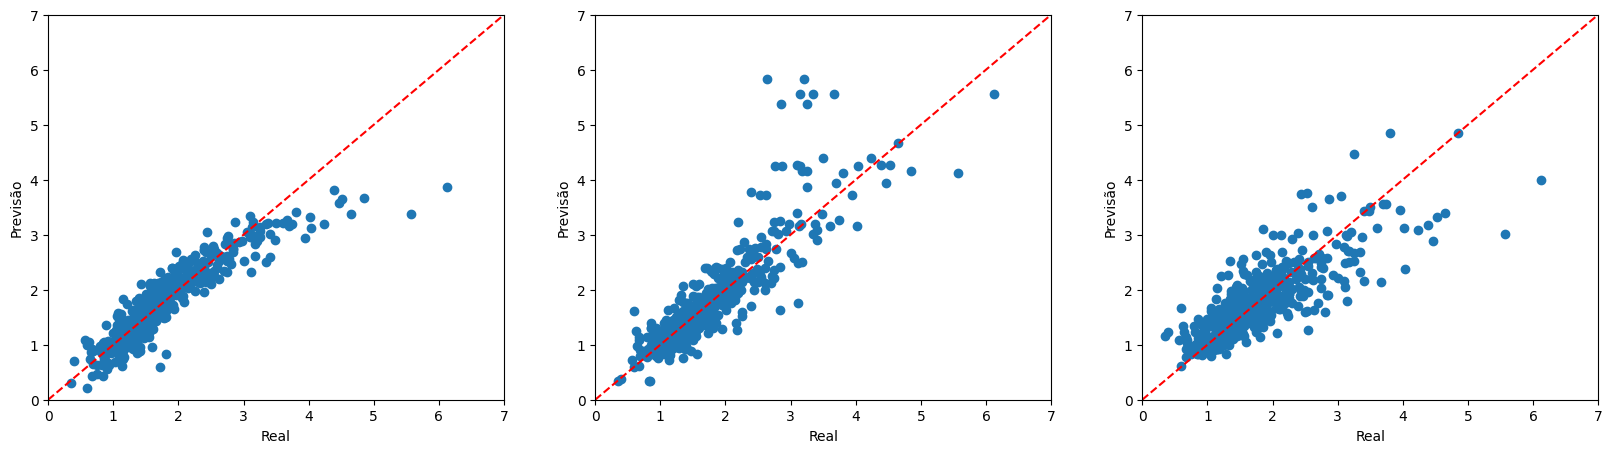

In [27]:
#importando o matplotlib para plotar visualmente a relação do teste com as prvisões feitas

import matplotlib.pyplot as plt

#criando o gráfico

fix,ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,700000],[0,700000], '--r')

ax[1].scatter(y_test/100000, y_ar/100000)
ax[1].plot([0,700000],[0,700000], '--r')

ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,700000],[0,700000], '--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')

ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')

ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

In [30]:
#importando a base de teste da competição e visualizando

test = pd.read_csv('test.csv')

test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [31]:
#elminando colunas com o mesmo critério da base de treino

test = test.drop(elim,axis=1)

#verificando colunas numéricas

columns2 = test.columns[test.dtypes != 'object']

columns2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [32]:
#cortando todas as colunas não-numéricas e verificando a base restante depois

test = test.loc[:,columns2]

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [33]:
#visualizando valores vazios

test.isnull().sum().sort_values(ascending=False).head(10)

MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF1       1
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtFinSF2       1
BsmtUnfSF        1
3SsnPorch        0
dtype: int64

In [34]:
#substituindo valores vazios por -1

test = test.fillna(-1)

#ajustando dados do modelo para usar no kaggle, usando a regressão linear pra fazer a previsão

y_pred = reg_rl.predict(test)

#adicionamos a coluna de previsão na base

test['SalePrice'] = y_pred

#e extraimos somente o ID e o preço de venda

result = test[['Id', 'SalePrice']]

result.head(3)

,Id,SalePrice
0,1461,122411.124612
1,1462,143311.576993
2,1463,170397.484512


In [35]:
#por ultimo, podemos exportar essa base de resultados

result.to_csv('result.csv', index=False)